#Weekly Counts of Deaths by State and Select Causes, 2014-2018

Final counts of deaths by the week the deaths occurred, by state of occurrence, and by select causes of death for 2014-2018. The dataset contains 14094 records and 30 columns. 

- In addition to the State and the Week, Week ending date is also provided - this is redundant data and either Week or Week ending date should be dropped.
- Each cause of death column has count columb (integer) and matching "flag" column that has value if the numbers were in a range from 1 to 9 and therefore suppresed.

Death counts in this dataset were derived from the National Vital Statistics System database that provides the most timely access to the data. Therefore, counts may differ slightly from final data due to differences in processing, recoding, and imputation.

Source: https://data.cdc.gov/NCHS/Weekly-Counts-of-Deaths-by-State-and-Select-Causes/3yf8-kanr

### I would like to research tendencies for the "Influenza and pneumonia (J10-J18)" cause of death. Possibly see what states at what time of the year have higher numbers.

In [1]:
#load python packages
import os
import pandas as pd
import datetime
import seaborn as sns

import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
#from pandas_profiling import ProfileReport
from urllib.request import urlretrieve
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import math
hypertable=[]

In [2]:
#Database URL
url = 'https://data.cdc.gov/api/views/3yf8-kanr/rows.csv'
#Load the data into a dataframe and display first 5 lines
df = pd.read_csv(url)
df.head()

,Jurisdiction of Occurrence,MMWR Year,MMWR Week,Week Ending Date,All Cause,Natural Cause,Septicemia (A40-A41),Malignant neoplasms (C00-C97),Diabetes mellitus (E10-E14),Alzheimer disease (G30),...,flag_neopl,flag_diab,flag_alz,flag_inflpn,flag_clrd,flag_otherresp,flag_nephr,flag_otherunk,flag_hd,flag_stroke
0,Alabama,2014,1,01/04/2014,355,327,NaN,60.0,NaN,10.0,...,NaN,Suppressed (counts 1-9),NaN,Suppressed (counts 1-9),NaN,Suppressed (counts 1-9),Suppressed (counts 1-9),NaN,NaN,NaN
1,Alabama,2014,2,01/11/2014,872,792,23.0,163.0,23.0,35.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Alabama,2014,3,01/18/2014,1044,971,21.0,209.0,34.0,31.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Alabama,2014,4,01/25/2014,1022,967,25.0,205.0,23.0,25.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Alabama,2014,5,02/01/2014,1040,953,18.0,200.0,26.0,38.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
#Check general information. Dataset shape and overall column descriptions
print('df shape: ', df.shape)
df.describe().T

df shape:  (14094, 30)


,count,mean,std,min,25%,50%,75%,max
MMWR Year,14094.0,2015.992337,1.416950,2014.0,2015.0,2016.0,2017.00,2018.0
MMWR Week,14094.0,26.601533,15.069286,1.0,14.0,27.0,40.00,53.0
All Cause,14094.0,1958.513197,7045.593511,50.0,309.0,780.0,1287.00,67664.0
Natural Cause,14094.0,1794.083156,6456.339032,43.0,276.0,709.0,1182.75,62704.0
Septicemia (A40-A41),7947.0,48.090726,135.598314,0.0,13.0,20.0,32.00,1067.0
Malignant neoplasms (C00-C97),14084.0,425.051122,1527.189508,10.0,63.0,165.0,278.00,12433.0
Diabetes mellitus (E10-E14),10548.0,76.507300,237.803654,0.0,20.0,30.0,48.00,2113.0
Alzheimer disease (G30),11272.0,99.396380,324.017824,0.0,22.0,38.0,62.00,3212.0
Influenza and pneumonia (J10-J18),9088.0,59.098702,189.145124,0.0,14.0,22.0,39.00,2939.0
Chronic lower respiratory diseases (J40-J47),12194.0,126.678940,428.392662,0.0,28.0,49.0,85.00,4382.0


In [4]:
df.columns

Index(['Jurisdiction of Occurrence', 'MMWR Year', 'MMWR Week',
       'Week Ending Date', 'All  Cause', 'Natural Cause',
       'Septicemia (A40-A41)', 'Malignant neoplasms (C00-C97)',
       'Diabetes mellitus (E10-E14)', 'Alzheimer disease (G30)',
       'Influenza and pneumonia (J10-J18)',
       'Chronic lower respiratory diseases (J40-J47)',
       'Other diseases of respiratory system (J00-J06,J30-J39,J67,J70-J98)',
       'Nephritis, nephrotic syndrome and nephrosis (N00-N07,N17-N19,N25-N27)',
       'Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified (R00-R99)',
       'Diseases of heart (I00-I09,I11,I13,I20-I51)',
       'Cerebrovascular diseases (I60-I69)', 'flag_allcause', 'flag_natcause',
       'flag_sept', 'flag_neopl', 'flag_diab', 'flag_alz', 'flag_inflpn',
       'flag_clrd', 'flag_otherresp', 'flag_nephr', 'flag_otherunk', 'flag_hd',
       'flag_stroke'],
      dtype='object')

In [5]:
#Rename Columns
#When counts are 1-9 the actual count is suppressed with null value and the corresponding "flag" column gets value describing that.
#I rename the columns to have shorter names
df.columns = ['State', 'Year', 'Week',
       'WeekEndDate', 'All_Cause', 'Nat_Cause',
       'Septicemia', 'Cancer',
       'Diabetes', 'Alzheimer',
       'Influenza_Pneumonia',
       'COPD',
       'Respiratory',
       'Kidney',
       'Other',
       'Heart',
       'Stroke', 'All_Cause_Supressed', 'Nat_Cause_Suppressed',
       'Septicemia_Suppressed', 'Cancer_Supressed', 'Diabetes_Supressed', 'Alzheimer_Supressed', 'Influenza_Pneumonia_Supressed',
       'COPD_Supressed', 'Respiratory_Supressed', 'Kidney_Supressed', 'Other_Supressed', 'Heart_Supressed',
       'Stroke_Supressed']

In [6]:
df.columns
df.head()

,State,Year,Week,WeekEndDate,All_Cause,Nat_Cause,Septicemia,Cancer,Diabetes,Alzheimer,...,Cancer_Supressed,Diabetes_Supressed,Alzheimer_Supressed,Influenza_Pneumonia_Supressed,COPD_Supressed,Respiratory_Supressed,Kidney_Supressed,Other_Supressed,Heart_Supressed,Stroke_Supressed
0,Alabama,2014,1,01/04/2014,355,327,NaN,60.0,NaN,10.0,...,NaN,Suppressed (counts 1-9),NaN,Suppressed (counts 1-9),NaN,Suppressed (counts 1-9),Suppressed (counts 1-9),NaN,NaN,NaN
1,Alabama,2014,2,01/11/2014,872,792,23.0,163.0,23.0,35.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Alabama,2014,3,01/18/2014,1044,971,21.0,209.0,34.0,31.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Alabama,2014,4,01/25/2014,1022,967,25.0,205.0,23.0,25.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Alabama,2014,5,02/01/2014,1040,953,18.0,200.0,26.0,38.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
#United States data is a combined data for all state
#I Remove United States from the list of states
df=df[~(df['State']=='United States')]
df['State'].unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'New York City',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype=object)

In [8]:
#Convert State names to String datatype
df['State']=df['State'].convert_dtypes()
df['State'].dtype

StringDtype

In [9]:
#Convert WeekEndDate values to date format
df['WeekEndDate']=pd.to_datetime(df['WeekEndDate'])
df['WeekEndDate'].dtypes

dtype('<M8[ns]')

In [10]:
df.head()

,State,Year,Week,WeekEndDate,All_Cause,Nat_Cause,Septicemia,Cancer,Diabetes,Alzheimer,...,Cancer_Supressed,Diabetes_Supressed,Alzheimer_Supressed,Influenza_Pneumonia_Supressed,COPD_Supressed,Respiratory_Supressed,Kidney_Supressed,Other_Supressed,Heart_Supressed,Stroke_Supressed
0,Alabama,2014,1,2014-01-04,355,327,NaN,60.0,NaN,10.0,...,NaN,Suppressed (counts 1-9),NaN,Suppressed (counts 1-9),NaN,Suppressed (counts 1-9),Suppressed (counts 1-9),NaN,NaN,NaN
1,Alabama,2014,2,2014-01-11,872,792,23.0,163.0,23.0,35.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Alabama,2014,3,2014-01-18,1044,971,21.0,209.0,34.0,31.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Alabama,2014,4,2014-01-25,1022,967,25.0,205.0,23.0,25.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Alabama,2014,5,2014-02-01,1040,953,18.0,200.0,26.0,38.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
#Convert all object data types to strings
df.convert_dtypes()
df.dtypes

State                                    string
Year                                      int64
Week                                      int64
WeekEndDate                      datetime64[ns]
All_Cause                                 int64
Nat_Cause                                 int64
Septicemia                              float64
Cancer                                  float64
Diabetes                                float64
Alzheimer                               float64
Influenza_Pneumonia                     float64
COPD                                    float64
Respiratory                             float64
Kidney                                  float64
Other                                   float64
Heart                                   float64
Stroke                                  float64
All_Cause_Supressed                     float64
Nat_Cause_Suppressed                    float64
Septicemia_Suppressed                    object
Cancer_Supressed                        

In [12]:
df['All_Cause_Supressed'].unique()

array([nan])

In [13]:
df['All_Cause'].isnull().sum()

0

In [14]:
#Since there are no suppressed values for All_Cause death counts, I am dropping the Suppressed column
df.drop(['All_Cause_Supressed'],axis=1, inplace=True)

In [15]:
df['Nat_Cause'].isnull().sum()

0

In [16]:
df['Nat_Cause_Suppressed'].unique()

array([nan])

In [17]:
#Since there are no suppressed values for Nat_Cause death counts, I am dropping the Suppressed column
df.drop(['Nat_Cause_Suppressed'],axis=1, inplace=True)

In [18]:
df['Septicemia'].isnull().sum()

6147

In [19]:
#I'm replacing nulls with zeros and values with 1.
df['Septicemia_Suppressed'].fillna(0,inplace=True)
df['Septicemia_Suppressed'].replace('Suppressed (counts 1-9)',1,inplace=True)

In [20]:
#Since the suppressed null values are those where count is between 1 and 9 I am replacing it with 5 
df['Septicemia'].fillna(5,inplace=True)
df['Septicemia'].isnull().sum()

0

In [21]:
#Repeating the process as above for all remaining columns
df['Cancer'].fillna(5,inplace=True)

In [22]:
df['Cancer_Supressed'].fillna(0,inplace=True)
df['Diabetes_Supressed'].fillna(0,inplace=True)
df['Alzheimer_Supressed'].fillna(0,inplace=True)
df['Influenza_Pneumonia_Supressed'].fillna(0,inplace=True)
df['COPD_Supressed'].fillna(0,inplace=True)
df['Respiratory_Supressed'].fillna(0,inplace=True)
df['Kidney_Supressed'].fillna(0,inplace=True)
df['Other_Supressed'].fillna(0,inplace=True)
df['Heart_Supressed'].fillna(0,inplace=True)
df['Stroke_Supressed'].fillna(0,inplace=True)

df['Cancer_Supressed'].replace('Suppressed (counts 1-9)',1,inplace=True)
df['Diabetes_Supressed'].replace('Suppressed (counts 1-9)',1,inplace=True)
df['Alzheimer_Supressed'].replace('Suppressed (counts 1-9)',1,inplace=True)
df['Influenza_Pneumonia_Supressed'].replace('Suppressed (counts 1-9)',1,inplace=True)
df['COPD_Supressed'].replace('Suppressed (counts 1-9)',1,inplace=True)
df['Respiratory_Supressed'].replace('Suppressed (counts 1-9)',1,inplace=True)
df['Kidney_Supressed'].replace('Suppressed (counts 1-9)',1,inplace=True)
df['Other_Supressed'].replace('Suppressed (counts 1-9)',1,inplace=True)
df['Heart_Supressed'].replace('Suppressed (counts 1-9)',1,inplace=True)
df['Stroke_Supressed'].replace('Suppressed (counts 1-9)',1,inplace=True)

In [23]:
df['Diabetes'].fillna(5,inplace=True)
df['Alzheimer'].fillna(5,inplace=True)
df['Influenza_Pneumonia'].fillna(5,inplace=True)
df['COPD'].fillna(5,inplace=True)
df['Respiratory'].fillna(5,inplace=True)
df['Kidney'].fillna(5,inplace=True)
df['Other'].fillna(5,inplace=True)
df['Heart'].fillna(5,inplace=True)
df['Stroke'].fillna(5,inplace=True)

df.isnull().sum()

State                            0
Year                             0
Week                             0
WeekEndDate                      0
All_Cause                        0
Nat_Cause                        0
Septicemia                       0
Cancer                           0
Diabetes                         0
Alzheimer                        0
Influenza_Pneumonia              0
COPD                             0
Respiratory                      0
Kidney                           0
Other                            0
Heart                            0
Stroke                           0
Septicemia_Suppressed            0
Cancer_Supressed                 0
Diabetes_Supressed               0
Alzheimer_Supressed              0
Influenza_Pneumonia_Supressed    0
COPD_Supressed                   0
Respiratory_Supressed            0
Kidney_Supressed                 0
Other_Supressed                  0
Heart_Supressed                  0
Stroke_Supressed                 0
dtype: int64

In [24]:
df.dtypes

State                                    string
Year                                      int64
Week                                      int64
WeekEndDate                      datetime64[ns]
All_Cause                                 int64
Nat_Cause                                 int64
Septicemia                              float64
Cancer                                  float64
Diabetes                                float64
Alzheimer                               float64
Influenza_Pneumonia                     float64
COPD                                    float64
Respiratory                             float64
Kidney                                  float64
Other                                   float64
Heart                                   float64
Stroke                                  float64
Septicemia_Suppressed                     int64
Cancer_Supressed                          int64
Diabetes_Supressed                        int64
Alzheimer_Supressed                     

In [25]:
#Get Month value from the date and turn it into categorical variables
df['Month']=df['WeekEndDate'].dt.month
df=pd.concat([df, pd.get_dummies(df['Month'])], axis=1)

In [26]:
#season function
def season (wkdate):
    if   wkdate >= datetime.date(wkdate.year,3,20) and wkdate < datetime.date(wkdate.year,6,21):
        return 'Spring'
    elif wkdate >= datetime.date(wkdate.year,6,21) and wkdate < datetime.date(wkdate.year,9,22):
        return 'Summer'
    elif wkdate >= datetime.date(wkdate.year,9,22) and wkdate < datetime.date(wkdate.year,12,21):
        return 'Fall'
    else :
        return 'Winter'

In [27]:
#Create four categorical columns for the seasons
df['Spring'] = 0
df['Summer'] = 0
df['Fall'] = 0
df['Winter'] = 0

df['Winter'] = (df['WeekEndDate'].apply(season) == 'Winter').astype('int32')
df['Spring'] = (df['WeekEndDate'].apply(season) == 'Spring').astype('int32')
df['Summer'] = (df['WeekEndDate'].apply(season) == 'Summer').astype('int32')
df['Fall'] = (df['WeekEndDate'].apply(season) == 'Fall').astype('int32')


In [28]:
#Number of Weeks in each year
noweeks=df.set_index(['State','Year','Week'],drop=False)['Week'].max(level=1).to_dict()
noweeks[2014]

53

In [29]:
#Calculate Next Week function
def nextWeek(year,week):
    try:
        maxweek = noweeks[year-1]
    except:
        maxweek = 52
    if week == 1:
        year -= 1
        week = maxweek
    else:
        week -=1
    return [year,week]
    

In [30]:
#Add next week columns to the dataframe

nextweeks=df.apply(lambda x: nextWeek(x['Year'], x['Week']), axis=1)
tmp=pd.DataFrame.from_dict(dict(zip(nextweeks.index, nextweeks.values))).T
tmp.columns = ['nxtWkYear','nxtWeek']
df=pd.concat([df,tmp],axis=1)


In [31]:
#shift the dataset 
#make sure that states don't overlap

df2=pd.DataFrame(df[['State','nxtWkYear','nxtWeek','Influenza_Pneumonia','Influenza_Pneumonia_Supressed']])
df2.columns = ['State','nxtWkYear','nxtWeek','NextWeekInfluenzaPneumonia','NextWeekInfluenzaPneumoniaSuppressed']
df=df.merge(df2,left_on=['State','Year','Week'],right_on=['State','nxtWkYear','nxtWeek']).drop(['nxtWkYear_x','nxtWeek_x','nxtWkYear_y','nxtWeek_y'],axis=1)




In [32]:
#Check the results to demonstrate that the new column has the next week data
df[['State', 'Year', 'Week','Influenza_Pneumonia','NextWeekInfluenzaPneumonia']][df['State']=='Pennsylvania']


,State,Year,Week,Influenza_Pneumonia,NextWeekInfluenzaPneumonia
10140,Pennsylvania,2014,1,33.0,65.0
10141,Pennsylvania,2014,2,65.0,63.0
10142,Pennsylvania,2014,3,63.0,73.0
10143,Pennsylvania,2014,4,73.0,71.0
10144,Pennsylvania,2014,5,71.0,84.0
...,...,...,...,...,...
10395,Pennsylvania,2018,47,49.0,66.0
10396,Pennsylvania,2018,48,66.0,51.0
10397,Pennsylvania,2018,49,51.0,46.0
10398,Pennsylvania,2018,50,46.0,51.0


In [33]:
#Since the last week of 2018 can't have "the next week"data drop last week of 2018 for all states
maxWeek = df['Week'][df['Year']==2018].max()
df=df[~((df['Year']==2018)&(df['Week']==maxWeek))]

In [34]:
#Create dummy variables for state. Add the dummies back to the dataframe.
df = pd.concat([df, pd.get_dummies(df['State'])], axis=1)

In [35]:
df.columns

Index([                               'State',
                                       'Year',
                                       'Week',
                                'WeekEndDate',
                                  'All_Cause',
                                  'Nat_Cause',
                                 'Septicemia',
                                     'Cancer',
                                   'Diabetes',
                                  'Alzheimer',
                        'Influenza_Pneumonia',
                                       'COPD',
                                'Respiratory',
                                     'Kidney',
                                      'Other',
                                      'Heart',
                                     'Stroke',
                      'Septicemia_Suppressed',
                           'Cancer_Supressed',
                         'Diabetes_Supressed',
                        'Alzheimer_Supressed',
             

In [36]:
df.head()

,State,Year,Week,WeekEndDate,All_Cause,Nat_Cause,Septicemia,Cancer,Diabetes,Alzheimer,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,Alabama,2014,1,2014-01-04,355,327,5.0,60.0,5.0,10.0,...,0,0,0,0,0,0,0,0,0,0
1,Alabama,2014,2,2014-01-11,872,792,23.0,163.0,23.0,35.0,...,0,0,0,0,0,0,0,0,0,0
2,Alabama,2014,3,2014-01-18,1044,971,21.0,209.0,34.0,31.0,...,0,0,0,0,0,0,0,0,0,0
3,Alabama,2014,4,2014-01-25,1022,967,25.0,205.0,23.0,25.0,...,0,0,0,0,0,0,0,0,0,0
4,Alabama,2014,5,2014-02-01,1040,953,18.0,200.0,26.0,38.0,...,0,0,0,0,0,0,0,0,0,0


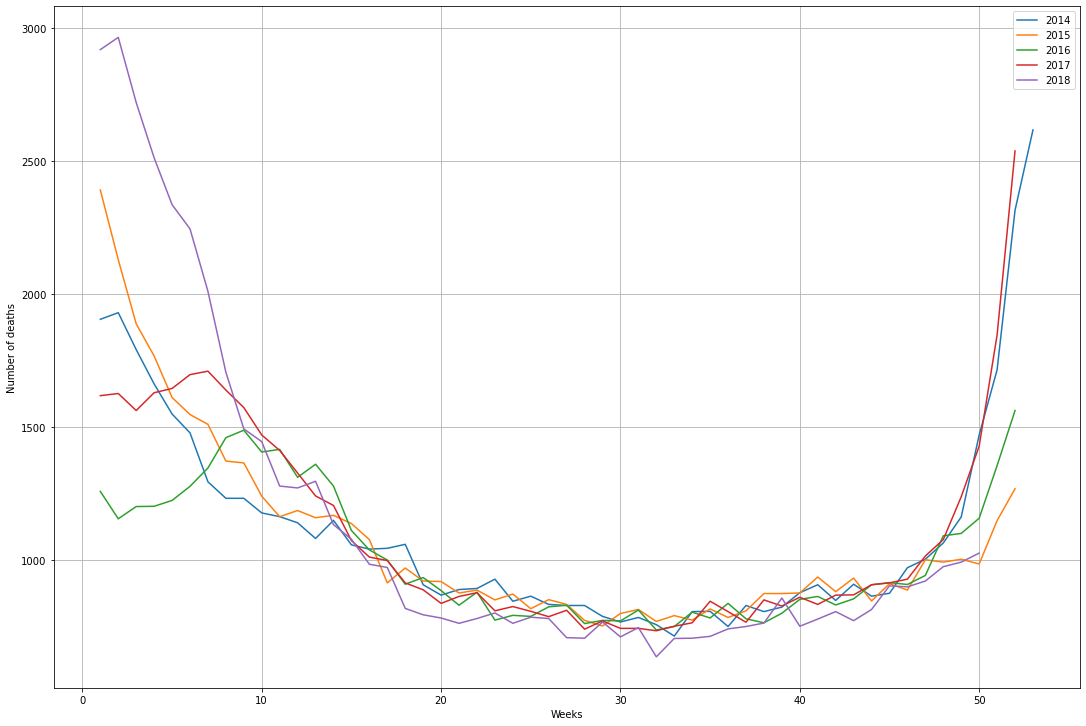

In [37]:
#Plot Predicted numbers for Influenza/Pneumonia weekly death rates 
fig, ax = plt.subplots(figsize=(15,10))
plt.axes

for year in df['Year'].unique():
    df_year=df[(df['Year']==year)]
    ax.plot(df_year.groupby(['Week'])['NextWeekInfluenzaPneumonia'].sum(),label=year)
    

fig.tight_layout()
plt.grid('on')
plt.legend()
plt.xlabel('Weeks')
plt.ylabel('Number of deaths')
plt.rc('font', size=18)
plt.show()

In [38]:
#List of years in the dataset
df['Year'].unique()

array([2014, 2015, 2016, 2017, 2018], dtype=int64)

In [39]:
#Set the 2018 data as test and the rest of the data as train

y_train=df[~(df['Year']==2018)]['NextWeekInfluenzaPneumonia']  
X_train=df[~(df['Year']==2018)].drop(['NextWeekInfluenzaPneumonia','State','Month'], axis=1)
y_test=df[df['Year']==2018]['NextWeekInfluenzaPneumonia'] 
X_test=df[df['Year']==2018].drop(['NextWeekInfluenzaPneumonia','State','Month'], axis=1) 

In [40]:
def metrics(model=None, features=None, X_test=None, y_true_test=None, X_train=None, y_true_train=None):
    hypertablerow['model']=model.__class__.__name__
    hypertablerow['features']=features
    hypertablerow['dropped isna columns']=True

    
    model.fit(X_train[features],y_train)
    
    y_pred_test = model.predict(X_test[features])
    y_pred_train = model.predict(X_train[features])

    hypertablerow['std_test'] = (y_true_test-y_pred_test).std()
    hypertablerow['std_train'] = (y_true_train - y_pred_train).std()
    hypertablerow['RMSE_test'] = math.sqrt(mean_squared_error(y_true=y_true_test, y_pred=y_pred_test))
    hypertablerow['RMSE_train']= math.sqrt(mean_squared_error(y_true=y_true_train, y_pred=y_pred_train))
    hypertablerow['training_score'] = model.score(X=X_train[features], y=y_pred_train)
    hypertablerow['test_score'] = model.score(X=X_test[features], y=y_pred_test)
    hypertable.append(hypertablerow)
    pd.Series(hypertablerow)
    
    plt.figure(figsize=(15,10))
    #plt.scatter(model.predict(X_test[features]), y_test)
    plt.scatter(model.predict(X_test[features]), y_test-model.predict(X_test[features]))
    fig.tight_layout()
    plt.grid('on')
    plt.xlabel('Predicted')
    plt.ylabel('Residual')
    plt.rc('font', size=20)
    plt.show()

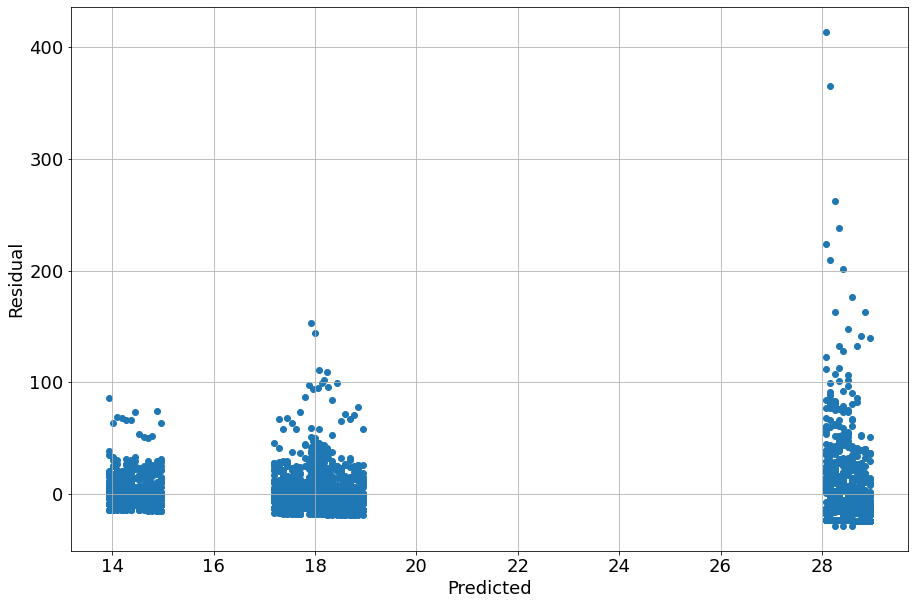

In [41]:
hypertablerow={}
model = LinearRegression()
features = ['Week', 'Year', 'Fall', 'Winter', 'Spring', 'Summer']
metrics(model=model, features=features, X_train=X_train, y_true_train=y_train, X_test=X_test, y_true_test=y_test)

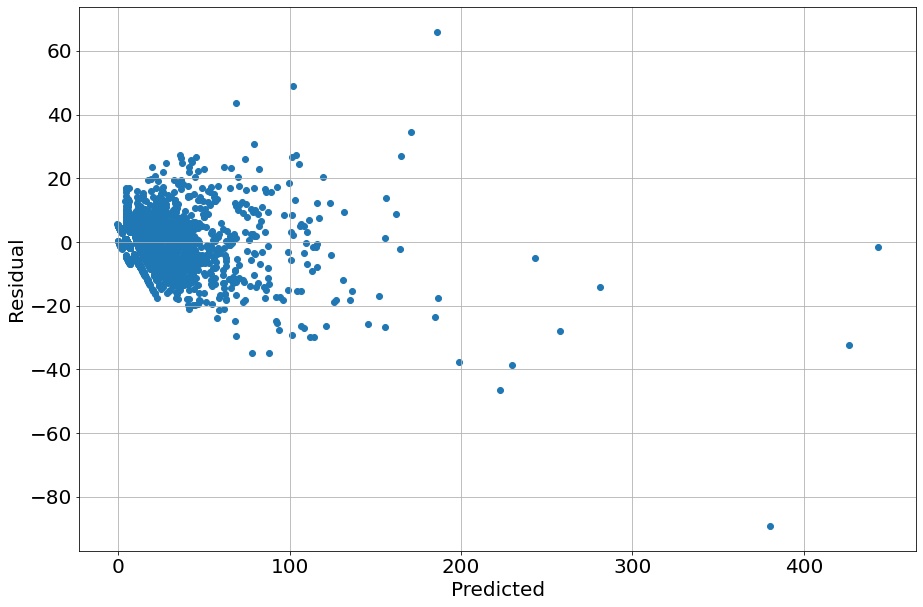

In [42]:
hypertablerow={}
model = LinearRegression()
features=['Week','Year','Fall','Winter','Spring','Summer','Influenza_Pneumonia']
metrics(model=model,features=features,X_train=X_train,y_true_train=y_train,X_test=X_test,y_true_test=y_test)
###



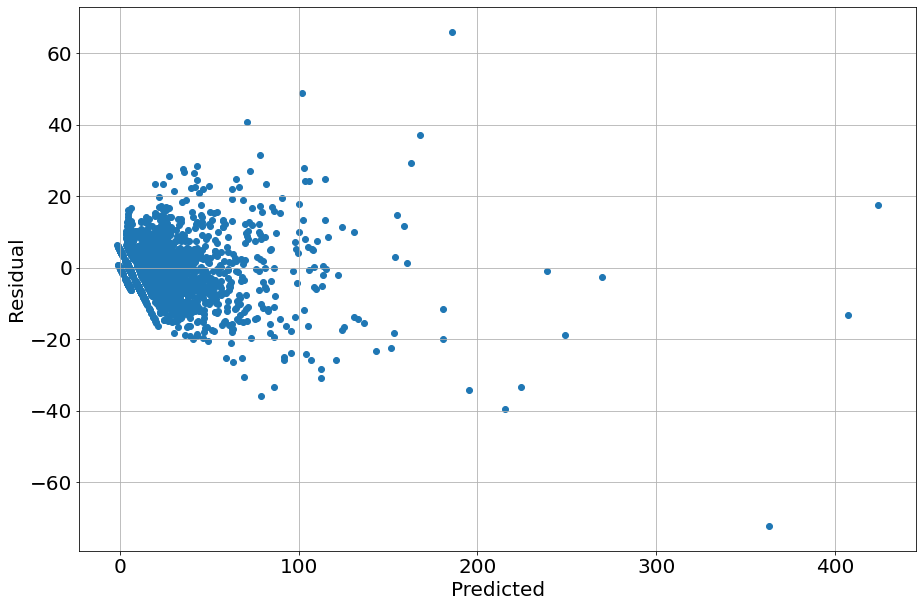

In [43]:
hypertablerow={}
model = LinearRegression()
features=['Week','Year','Fall','Winter','Spring','Summer','Influenza_Pneumonia','Respiratory']
metrics(model=model,features=features,X_train=X_train,y_true_train=y_train,X_test=X_test,y_true_test=y_test)

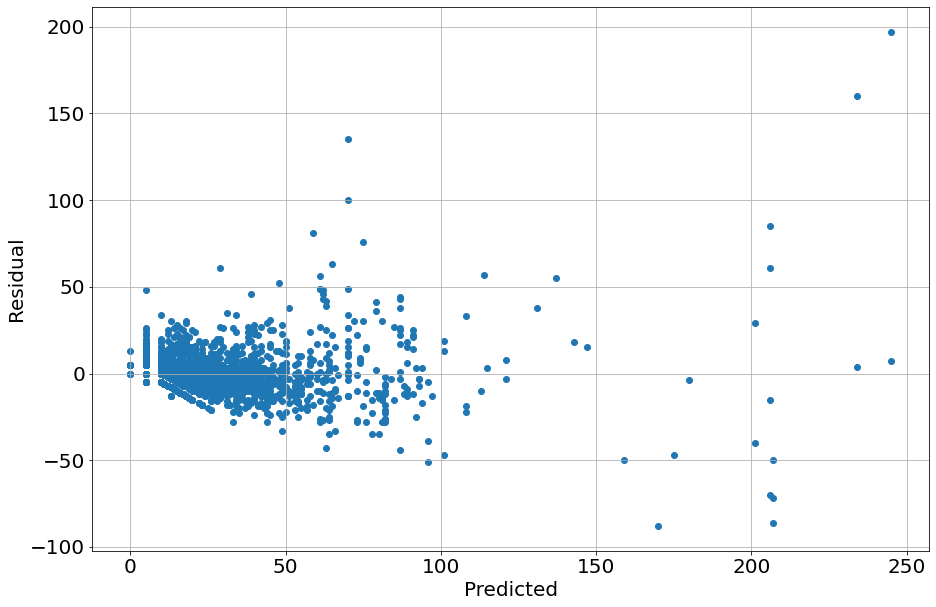

In [44]:
from sklearn.ensemble import RandomForestClassifier

hypertablerow={}
model = RandomForestClassifier(n_estimators=300, random_state = 1,n_jobs=-1)
features=['Week','Year','Fall','Winter','Spring','Summer','Influenza_Pneumonia','Respiratory']
metrics(model=model,features=features,X_train=X_train,y_true_train=y_train,X_test=X_test,y_true_test=y_test)

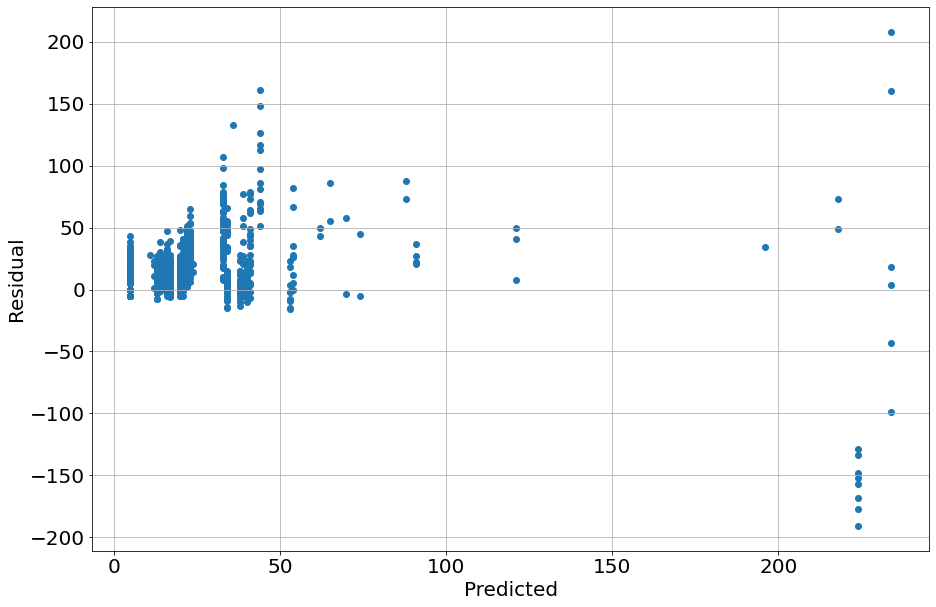

In [45]:
from sklearn.linear_model import LogisticRegression
hypertablerow={}
model = LogisticRegression(solver='liblinear')
features=['Week','Year','Fall','Winter','Spring','Summer','Influenza_Pneumonia','Respiratory']
metrics(model=model,features=features,X_train=X_train,y_true_train=y_train,X_test=X_test,y_true_test=y_test)

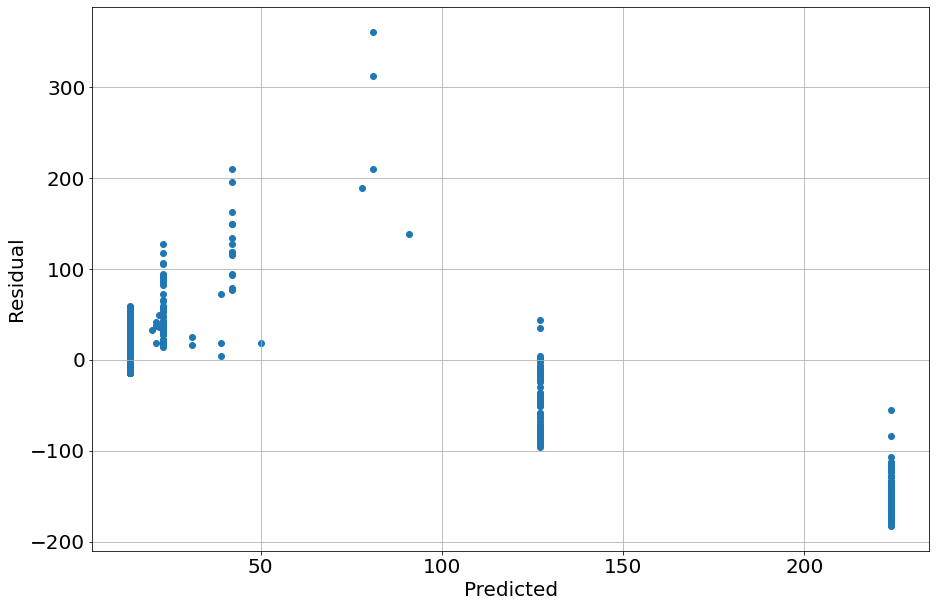

In [46]:
from sklearn.linear_model import SGDClassifier
hypertablerow={}
model = SGDClassifier()
features=['Week','Year','Fall','Winter','Spring','Summer','Influenza_Pneumonia','Respiratory']
metrics(model=model,features=features,X_train=X_train,y_true_train=y_train,X_test=X_test,y_true_test=y_test)

In [47]:
pd.DataFrame(hypertable).to_csv('hypertable.csv')
#add test set score

In [48]:
#for values in hypertable.items():
#    print(values)
print(*hypertable, sep = "\n")

{'model': 'LinearRegression', 'features': ['Week', 'Year', 'Fall', 'Winter', 'Spring', 'Summer'], 'dropped isna columns': True, 'std_test': 26.95752101173027, 'std_train': 22.609005475457778, 'RMSE_test': 27.02235606225712, 'RMSE_train': 22.607984914124952, 'training_score': 1.0, 'test_score': 1.0}
{'model': 'LinearRegression', 'features': ['Week', 'Year', 'Fall', 'Winter', 'Spring', 'Summer', 'Influenza_Pneumonia'], 'dropped isna columns': True, 'std_test': 7.563781690093803, 'std_train': 7.423144704885143, 'RMSE_test': 7.572705104267073, 'RMSE_train': 7.422809627145336, 'training_score': 1.0, 'test_score': 1.0}
{'model': 'LinearRegression', 'features': ['Week', 'Year', 'Fall', 'Winter', 'Spring', 'Summer', 'Influenza_Pneumonia', 'Respiratory'], 'dropped isna columns': True, 'std_test': 7.320982540882033, 'std_train': 7.335158923602916, 'RMSE_test': 7.324360765583916, 'RMSE_train': 7.334827817505615, 'training_score': 1.0, 'test_score': 1.0}
{'model': 'RandomForestClassifier', 'featur

In [49]:
#measure how good is the model is 
#use std error
#rmse
#add that to hyperparameter table and save
#save the table
#RandomForrest
#Classification
#Logistic Regretion
#RandomForrest Classifier
# ~XGBoost
#SGD classifier (Warm start)
#polinomial regression 

#2.residual plot difference prediction vs truth

#1.Estimator selection flowchart in scikitlearn